# <center> Clustering political regimes </center>

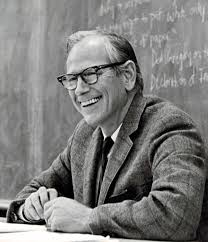

* Do you recognize this man?

### Data set

We have a data set containing countries and different indicators, measuring the key parameters of Robert Dahl's theory that all countries can be classified into one of four types. We will try to apply it in practice and try to identify 4 clusters in the data on the political structure of countries. You can read more about the dataset at the [link](https://www3.nd.edu/~mcoppedg/crd/Codebook.doc).

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('DahlDims.csv')
data.head()

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
0,Afghanistan,AFGN,1950,50,-1.150339342,-1.013598554,-1.011842735,-0.741150814,-1.150339342,-1.013598554,...,,,4,700,AFG,AFG,0.15,0.09,1.01,0.82
1,Afghanistan,AFGN,1951,51,-1.109144219,-0.956002727,-0.990235662,-0.790842427,-1.109144219,-0.956002727,...,,,4,700,AFG,AFG,0.13,0.06,1.01,0.89
2,Afghanistan,AFGN,1952,52,-1.106897206,-0.839698187,-1.011173094,-0.804507241,-1.106897206,-0.839698187,...,,,4,700,AFG,AFG,0.14,0.01,1.04,0.97
3,Afghanistan,AFGN,1953,53,-1.104317508,-0.675316224,-1.018490208,-0.547784602,-1.104317508,-0.675316224,...,,,4,700,AFG,AFG,0.13,0.06,1.04,0.90
4,Afghanistan,AFGN,1954,54,-1.107440167,-0.497937884,-1.061737774,-0.453082232,-1.107440167,-0.497937884,...,,,4,700,AFG,AFG,0.09,0.01,1.04,0.93


Our data set has 28 columns, but we will work with 2 of them. These are the CONTEST and INCLUS columns.
We will build the distribution of countries by these parameters for a certain year, for example, for 2000.

Let's save the data for the countries for 2000 separately.

In [3]:
year_2000_data = data[data.year == 2000]

In [6]:
year_2000_data.head()

,cname,abbr,year,yr,CONTEST,INCLUS,CONTESTstd,INCLUSstd,ContestationA,INCLUSA,...,ALTINF,POLY,ccode,ccodecow,ccodealp,ccodewb,f1mean,f2mean,f1sd,f2sd
50,Afghanistan,AFGN,2000,2000,-1.860250763,-3.632547535,-1.177129448,-1.956969586,,,...,,,4,700,AFG,AFG,0.525,0.495,0.915,0.675
101,Albania,ALBN,2000,2000,-0.055792334,0.529475222,0.473950014,0.852395775,,,...,,,8,339,ALB,ALB,0.525,0.495,0.915,0.675
140,Algeria,ALGR,2000,2000,-1.021945168,0.513831312,-0.410079829,0.841836136,,,...,,,12,615,DZA,DZA,0.525,0.495,0.915,0.675
191,Andorra,ANDO,2000,2000,0.400964891,-0.173187886,0.891882876,0.378098177,,,...,,,20,232,AND,ADO,0.525,0.495,0.915,0.675
217,Angola,ANGL,2000,2000,-1.36415187,-0.021909254,-0.723198961,0.480211254,,,...,,,24,540,AGO,AGO,0.525,0.495,0.915,0.675


In [7]:
# How many countries are there in our sample?



Let's build a graph of our countries for the year 2000. Let's convert from string to numerical

In [8]:
year_2000_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 50 to 7562
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cname          192 non-null    object 
 1   abbr           192 non-null    object 
 2   year           192 non-null    int64  
 3   yr             192 non-null    int64  
 4   CONTEST        192 non-null    object 
 5   INCLUS         192 non-null    object 
 6   CONTESTstd     192 non-null    object 
 7   INCLUSstd      192 non-null    object 
 8   ContestationA  192 non-null    object 
 9   INCLUSA        192 non-null    object 
 10  CONTESTB       192 non-null    object 
 11  INCLUSB        192 non-null    object 
 12  CONTESTC       192 non-null    object 
 13  INCLUSC        192 non-null    object 
 14  CRSUFF         192 non-null    object 
 15  FAIRELT        192 non-null    object 
 16  FREEORG        192 non-null    object 
 17  FREXP          192 non-null    object 
 18  ALTINF  

In [5]:
x = pd.to_numeric(year_2000_data["INCLUS"]).values
y = pd.to_numeric(year_2000_data["CONTEST"]).values

We import the module for drawing and build a graph, where on the X axis we have the INCLUS column, and on the y - CONTEST. Additionally, let's plot lines through the origin.

In [11]:
!pip3 install matplotlib

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(12, 8))
plt.scatter(x,y, s =7)
plt.title('Year 2000')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

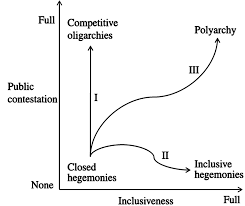

### Кластеризация с помощью KMeans

Кластеризатор KMeans разбивает множество элементов векторного пространства на заранее известное число кластеров k. Он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге суммарное квадратичное отклонение V уменьшается, поэтому зацикливание невозможно.

Импортируем модуль KMeans из sklearn.

In [12]:
from sklearn.cluster import KMeans

Вытащим данные для обучения, это только столбцы INCLUS и CONTEST.

In [13]:
X = year_2000_data[['INCLUS','CONTEST']]

Изначально теоритически мы знаем, что в наших данных 4 кластера. Поэтому инициализируем KMeans с таким количеством кластеров, передав их в параметр n_clusters

In [14]:
kmeans = KMeans(n_clusters = 4, random_state = 0)

Теперь обучим кластерезатор на всех данных

In [15]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

Посмотрим как наши данные пометились.

In [16]:
kmeans.labels_

array([1, 3, 2, 3, 2, 3, 0, 3, 0, 0, 2, 3, 1, 3, 3, 2, 0, 3, 0, 2, 0, 3,
       0, 0, 1, 3, 2, 1, 2, 2, 0, 3, 3, 2, 0, 2, 3, 1, 1, 2, 0, 3, 3, 2,
       0, 0, 0, 3, 3, 0, 3, 2, 0, 2, 2, 0, 3, 2, 0, 0, 2, 2, 3, 0, 3, 0,
       3, 3, 3, 2, 0, 3, 0, 0, 0, 3, 3, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 3,
       2, 0, 1, 2, 2, 0, 3, 3, 2, 1, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       0, 0, 3, 0, 3, 0, 2, 3, 1, 3, 3, 3, 0, 0, 0, 3, 3, 0, 1, 1, 3, 0,
       0, 3, 3, 3, 0, 0, 1, 0, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 2, 0, 0, 3,
       1, 0, 0, 3, 3, 3, 3, 2, 3, 2, 0, 0, 2, 0, 2, 3, 3, 3, 2, 1, 0, 2,
       3, 2, 3, 2, 3, 1, 0, 0, 0, 2, 3, 3, 2, 2, 3, 2], dtype=int32)

Всем нашим данным были присвоены лейблы от 0 до 3.

Создадим новый Датафрейм, в который поместим столбцы INCLUS, CONTEST и новый столбец Labels в котором мы будем хранить помеченные кластерезатором данные.

In [17]:
draw = pd.DataFrame({'INCLUS': x,
                   'CONTEST': y,
                   'Labels': kmeans.labels_})

Теперь давайте построим тот же график что и в начале, но уже с окраской кластеров. Для этого используем seaborn.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


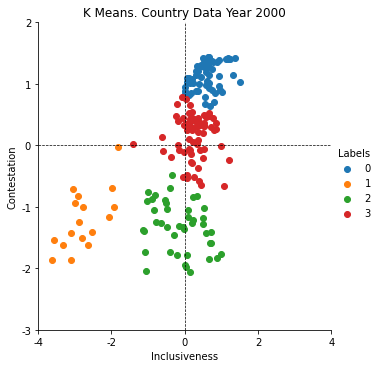

In [20]:
sns.FacetGrid(draw, hue="Labels", size=5).map(plt.scatter, "INCLUS", "CONTEST").add_legend()

plt.title('K Means. Country Data Year 2000')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

На рисунке отчетливо видно 4 кластера.

### Как узнать количество кластеров?

В нашем датасете, благодаря теории, которая стояла за ним, мы знали что у нас 4 кластера. Но что если количество кластеров нам не известно? Мы все же можем определить "оптимальное" количество кластеров и в этом нам опять поможет кластерезатор KMeans.

Импортируем модуль для рисования

In [21]:
import pylab as pl

Будем пробовать брать разнное количество кластеров и смотреть как это будет влиять на score модели. Количество кластеров будет варьироваться от 1 до 20.

In [22]:
Nc = range(1, 20)

Создадим список кластеризаторов Kmeans, с разным количеством предполагаемых кластеров

In [23]:
kmeans = [KMeans(n_clusters=i) for i in Nc]

Посчитаем теперь для каждого из них score.

In [24]:
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

А теперь посстроим график, так называемой Elbow curve

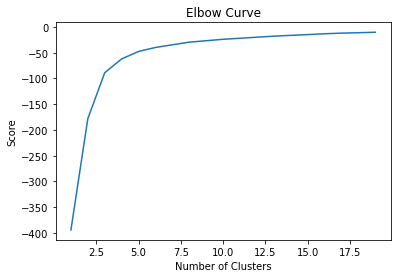

In [25]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Оптимальное количество кластеров находится в месте перелома графика. У нас это происходит где-то в районе 3х кластеров. Давайте построим график для 2000 года уже с 3-я кластерами и посмотрим как будет выглядеть график.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


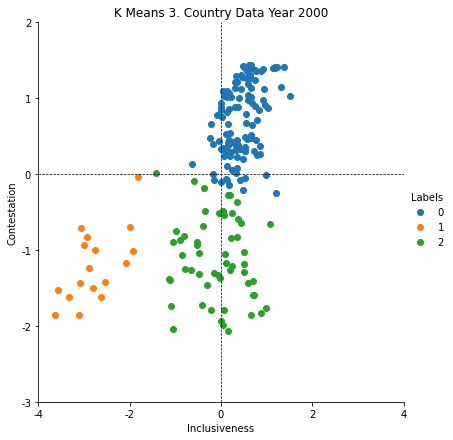

In [26]:
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(X)

draw_3 = pd.DataFrame({'INCLUS': x,
                   'CONTEST': y,
                   'Labels': kmeans_3.labels_})

sns.FacetGrid(draw_3, hue="Labels", size=6) \
   .map(plt.scatter, "INCLUS", "CONTEST") \
   .add_legend()

plt.title('K Means 3. Country Data Year 2000')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()

Посмотрим как выглядели данные в 1950 году ( когда было записано первое наблюдение из нашего датасета). Проделаем все операции как и для данных 2000 года.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


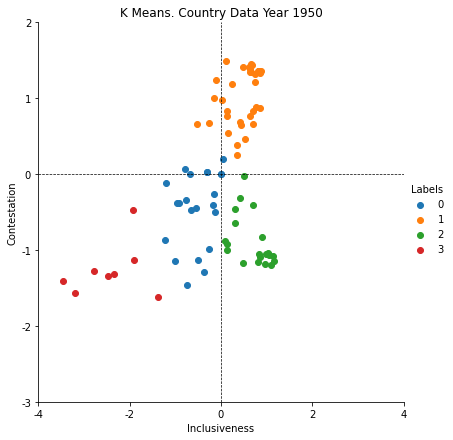

In [27]:
year_1950_data = data[data.year == 1950]
x = pd.to_numeric(year_1950_data["INCLUS"]).values
y = pd.to_numeric(year_1950_data["CONTEST"]).values
X = year_1950_data[['INCLUS','CONTEST']]

kmeans_1950 = KMeans(n_clusters=4, random_state=0).fit(X)

draw_1950 = pd.DataFrame({'INCLUS': x,
                   'CONTEST': y,
                   'Labels': kmeans_1950.labels_})

sns.FacetGrid(draw_1950, hue="Labels", size=6) \
   .map(plt.scatter, "INCLUS", "CONTEST") \
   .add_legend()

plt.title('K Means. Country Data Year 1950')
plt.xlabel('Inclusiveness')
plt.ylabel('Contestation')
plt.yticks((-3,-2,-1,0,1,2), ("-3","-2","-1","0","1","2"))
plt.xticks((-4,-2,0,2,4), ("-4","-2","0","2","4"))
plt.axvline(x=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.axhline(y=0, linestyle='--', color = 'black', linewidth = 0.7)
plt.show()